In [236]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
from scipy import io
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
sns.set_context('talk')
import malis

In [237]:
# Load PyGreentea
# Relative path to where PyGreentea resides
pygt_path = '../PyGreentea'
sys.path.append(pygt_path)
import PyGreentea as pygt

In [238]:
def loadloss(fname,factor):
    if os.path.isfile(fname):
        d = os.path.split(fname)[0]
        m=io.loadmat(fname)
        m['loss']=m['loss'][:,1:].reshape((-1,factor))
        m['t'] = np.arange(1,1+m['loss'].shape[0])*factor
        return m,d

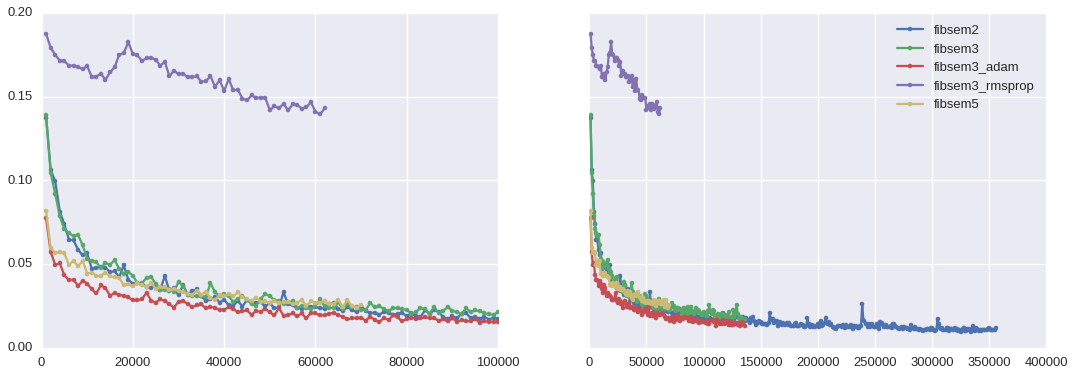

In [239]:
factor=1000
fs = ['fibsem2/loss.mat',
      'fibsem3/loss.mat',
      'fibsem3_adam/loss.mat',
      'fibsem3_rmsprop/loss.mat',
      'fibsem5/loss.mat',
     ]

(ms,legstr) = zip(*[loadloss(f,factor) for f in fs])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,6));
for m in ms:
    ax1.plot(m['t'],np.mean(m['loss'],axis=1),'.-');
ax1.grid();
ax1.set_xlim((0,100000));
for m in ms:
    ax2.plot(m['t'],np.mean(m['loss'],axis=1),'.-');
ax2.grid();
ax2.legend(legstr);

In [ ]:
# Load the datasets
raw_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/img_normalized.h5'
gt_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
aff_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_aff.h5'
testeu_h5_fname = 'test_out_0.h5'
test_h5_fname = 'test_out_0.h5'

raw_h5f = h5py.File(raw_h5_fname,'r')
gt_h5f = h5py.File(gt_h5_fname,'r')
aff_h5f = h5py.File(aff_h5_fname,'r')
testeu_h5f = h5py.File(testeu_h5_fname,'r')
test_h5f = h5py.File(test_h5_fname,'r')

raw = raw_h5f['main']
gt = gt_h5f['main']
aff = aff_h5f['main']
testeu = testeu_h5f['main']
test = test_h5f['main']